In [55]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# from sklearn.preprocessing import MinMaxScaler

# MAIN VERSION

In [ ]:
# Read data
df = pd.read_excel("data/riskindicators_table.xlsx")
df['Risk Category'] = df['Risk Category'].ffill()
df = df.melt(id_vars=['Risk Category', 'Risk ID','Risk Indicator'], var_name='Company', value_name='Value')
df['Risk ID'] = df['Risk ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Risk Category   115 non-null    object 
 1   Risk ID         115 non-null    object 
 2   Risk Indicator  115 non-null    object 
 3   Company         115 non-null    object 
 4   Value           106 non-null    float64
dtypes: float64(1), object(4)
memory usage: 4.6+ KB


In [57]:
# scaler = MinMaxScaler()
# df['Standardized Value'] = df.groupby(['Risk Category', 'Risk Indicator'])['Value'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten() * 100)

# df

In [ ]:
# Standardize the values for each indicator in each category
df['Standardized Value'] = df.groupby(['Risk Category', 'Risk Indicator'])['Value'].transform(lambda x: (x / x.mean() * 100))
df

,Risk Category,Risk ID,Risk Indicator,Company,Value,Standardized Value
0,1. Competitive behavior/practice,1.01,Valuation growth (%),Google DeepMind,0.356217,7.333166
1,1. Competitive behavior/practice,1.02,Market share (revenue),Google DeepMind,0.070000,72.913629
2,1. Competitive behavior/practice,1.03,Acceleration (yoy change in model updates freq...,Google DeepMind,-0.780000,394.936709
3,1. Competitive behavior/practice,1.04,Acceleration (yoy change in new model frequency)*,Google DeepMind,NaN,NaN
4,1. Competitive behavior/practice,1.05,"Acquisitions - annual, count",Google DeepMind,0.000000,0.000000
...,...,...,...,...,...,...
110,4. Incidents,4.01,AI-related incidents,OpenAI,30.000000,180.722892
111,4. Incidents,4.02,Cybersecurity incidents (related to security/s...,OpenAI,2.000000,500.000000
112,4. Incidents,4.03,Litigation Frequency where company is defendant,OpenAI,18.000000,346.153846
113,4. Incidents,4.04,Common Vulnerabilities and Exposures (CVE),OpenAI,18.000000,375.000000


In [59]:
df.to_csv("data/riskindicators_table_std.csv", index=False)

In [60]:
# Aggregate the data by 'Company' and 'Risk Category'
risk_category_df = df.groupby(['Risk Category', 'Company']).agg({
    'Standardized Value': 'mean'
}).reset_index()

risk_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Risk Category       20 non-null     object 
 1   Company             20 non-null     object 
 2   Standardized Value  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


In [61]:
risk_category_df

,Risk Category,Company,Standardized Value
0,1. Competitive behavior/practice,Anthropic,95.254702
1,1. Competitive behavior/practice,Google DeepMind,78.955627
2,1. Competitive behavior/practice,Meta AI,33.632196
3,1. Competitive behavior/practice,OpenAI,229.047288
4,1. Competitive behavior/practice,x.AI,33.598337
5,2. ​Compliance and Safety Practices,Anthropic,160.769767
6,2. ​Compliance and Safety Practices,Google DeepMind,82.209830
7,2. ​Compliance and Safety Practices,Meta AI,95.985547
8,2. ​Compliance and Safety Practices,OpenAI,137.691159
9,2. ​Compliance and Safety Practices,x.AI,23.343697


In [62]:
risk_category_df.to_csv("data/risk_category_std.csv", index=False)

In [88]:
# Aggregate the data by 'Company'
risk_company_df = df.groupby(['Company']).agg({
    'Standardized Value': 'mean'
}).reset_index()
risk_company_df = risk_company_df.sort_values(by='Standardized Value', ascending=True).reset_index(drop=True)
risk_company_df

,Company,Standardized Value
0,x.AI,25.237480
1,Meta AI,44.761123
2,Google DeepMind,74.772801
3,Anthropic,112.059332
4,OpenAI,228.928784


In [90]:
risk_company_df.to_csv("data/risk_company_std.csv", index=False)

In [119]:
# Sort the DataFrame by 'Standardized Value' in descending order
sorted_risk_company_df = risk_company_df.sort_values(by='Standardized Value', ascending=False)

# Create a table
table = go.Figure(data=[go.Table(
    header=dict(values=['Company', 'Risk Index'],
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[sorted_risk_company_df['Company'], sorted_risk_company_df['Standardized Value'].map('{:.2f}'.format)],
               fill_color='lavender',
               align='center'))
])

# Update the layout
table.update_layout(
    # title=None,
    autosize=False,
    width=500,
    height=200,
    margin=dict(l=10, r=10, t=40, b=0)
)

# Show the table
table.show()

In [ ]:
# Create a horizontal bar chart
fig = go.Figure(data=[
    go.Bar(
        name='Standardized Value', 
        x=risk_company_df['Standardized Value'], 
        y=risk_company_df['Company'], 
        orientation='h',
        text=risk_company_df.index + 1,  # Add rank as text
        textposition='auto'
    )
])

# Update the layout to remove x-axis and show y-axis with company names
fig.update_layout(
    # title=None,
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=True, tickmode='array', tickvals=risk_company_df.index, ticktext=risk_company_df['Company']),
    template='plotly_white'
)

fig.show()

In [ ]:
# Create a list of unique risk categories
companies = risk_category_df['Company'].unique()
categories = risk_category_df['Risk Category'].unique()


# Create a radar chart
fig = go.Figure()

# Add a trace for each company
for company in companies:
    company_data = risk_category_df[risk_category_df['Company'] == company]
    fig.add_trace(go.Scatterpolar(
        r=company_data['Standardized Value'],
        theta=categories,
        connectgaps = True,
        fill='toself',
        name=company
    ))

# Update the layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 400]
        )),
    showlegend=True,
    title="Risk Index based on Category"
)

fig.show()

In [64]:
# Create a subplot with 1 row and multiple columns (one for each company)
fig = make_subplots(
    rows=1, 
    cols=len(companies), 
    subplot_titles=[f"{company}" for company in companies], 
    specs=[[{'type': 'polar'}] * len(companies)]
)

# Add a trace for each company in its respective subplot
for i, company in enumerate(companies):
    company_data = risk_category_df[risk_category_df['Company'] == company]
    company_data = company_data.replace({
        'Risk Category': {
            '1. Competitive behavior/practice': 'Behaviour',
            '2. \u200bCompliance and Safety Practices': 'Safety',
            '3. Commitment to emerging standards': 'Standards',
            '4. Incidents': 'Incident'
        }
    })
    fig.add_trace(go.Scatterpolar(
        r=company_data['Standardized Value'],
        theta=company_data['Risk Category'],
        connectgaps=True,
        fill='toself',
        name=company
    ), row=1, col=i+1)

# Adjust the position of the subplot titles
for annotation in fig['layout']['annotations']:
    annotation['y'] += 0.1  

# Update the layout
for j in range(1, len(companies) + 1):
    fig.update_layout(**{f'polar{j}': dict(
        radialaxis=dict(
            visible=True,
            range=[0, 400]
        ),
        angularaxis=dict(
            rotation=90
        ))
    })

fig.update_layout(
    width=3500,  # Adjust width as needed
    showlegend=False,
    # title="Risk Index based on Category for Each Company"
)

fig.show()


In [65]:
# from plotly.subplots import make_subplots

# # Create a subplot with 5 rows (one for each company) and 1 column
# fig = make_subplots(
#     rows=len(companies), 
#     cols=1, 
#     subplot_titles=[f"{company}" for company in companies], 
#     specs=[[{'type': 'polar'}]] * len(companies)
# )

# # Adjust the position of the subplot titles
# for annotation in fig['layout']['annotations']:
#     annotation['y'] += 0.02

# # Add a trace for each company in its respective subplot
# for i, company in enumerate(companies):
#     company_data = risk_category_df[risk_category_df['Company'] == company]
#     fig.add_trace(go.Scatterpolar(
#         r=company_data['Standardized Value'],
#         theta=company_data['Risk Category'],
#         connectgaps=True,
#         fill='toself',
#         name=company
#     ), row=i+1, col=1)

# # Update the layout
# for j in range(1, len(companies) + 1):
#     fig.update_layout(**{f'polar{j}': dict(
#         radialaxis=dict(
#             visible=True,
#             range=[0, 400]
#         ),
#         angularaxis=dict(
#             rotation=90
#         ))
#     })

# fig.update_layout(
#     height=1920,  # Adjust height as needed
#     showlegend=True,
#     # title="Risk Index based on Category for Each Company"
# )

# fig.show()


In [66]:
# Create a radar chart for each category
for category in categories:
    category_data = df[df['Risk Category'] == category]
    
    fig = go.Figure()
    
    # Add a trace for each company
    for company in companies:
        company_data = category_data[category_data['Company'] == company]
        fig.add_trace(go.Scatterpolargl(
            r=company_data['Standardized Value'],
            theta=company_data['Risk ID'],
            connectgaps=True,
            fill='toself',
            name=company
        ))

    # Update the layout to move the legend to the bottom
    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.3,
            xanchor="center",
            x=0.5
        )
    )
    
    # Add annotations for Risk ID and Risk Indicator
    annotations = []
    for risk_id, risk_indicator in zip(category_data['Risk ID'].unique(), category_data['Risk Indicator'].unique()):
        annotations.append(f"{risk_id}: {risk_indicator}")
    
    # Update the layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 500]
            )),
        showlegend=True,
        title=f"Radar Chart for {category}",
        annotations=[dict(
            x=1.0,
            y=1.1,
            xref="paper",
            yref="paper",
            showarrow=False,
            text="<br>".join(annotations),
            align="left"
        )]
    )
    
    fig.show()

## Regressions

### Only components

In [120]:
import statsmodels.api as sm

# Pivot the data so that each company has its own row and each risk category becomes a column.
df_pivot = risk_category_df.pivot(index='Company', columns='Risk Category', values='Standardized Value')

# Rename the columns for clarity. The mapping is:
# "1. Competitive behavior/practice"  -> "Competitive"
# "2. ​Compliance and Safety Practices" -> "Safety"
# "3. Commitment to emerging standards" -> "Commitment"
# "4. Incidents"                        -> "Incidents"
rename_map = {
    "1. Competitive behavior/practice": "Competitive",
    "2. ​Compliance and Safety Practices": "Safety",
    "3. Commitment to emerging standards": "Commitment",
    "4. Incidents": "Incidents"
}
df_pivot = df_pivot.rename(columns=rename_map)

# Display the pivoted data (optional)
print(df_pivot)

# Define the dependent variable (y) and independent variables (X)
y = df_pivot['Incidents']
X = df_pivot[['Competitive', 'Safety', 'Commitment']]

# Add a constant term to the independent variables (the intercept)
X = sm.add_constant(X)

# Run the OLS regression
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the summary which includes coefficients, standard errors, and p-values.
print(model.summary())


Risk Category    Competitive      Safety  Commitment   Incidents
Company                                                         
Anthropic          95.254702  160.769767  273.865207    6.255792
Google DeepMind    78.955627   82.209830  101.403155   45.315879
Meta AI            33.632196   95.985547   26.919137   34.518845
OpenAI            229.047288  137.691159   97.812501  380.375348
x.AI               33.598337   23.343697    0.000000   33.534137
                            OLS Regression Results                            
Dep. Variable:              Incidents   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1.165
Date:                Thu, 20 Feb 2025   Prob (F-statistic):              0.577
Time:                        20:21:56   Log-Likelihood:                -18.133
No. Observations:                   5   AIC:                           

c:\Users\madegde\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

       feature       VIF
0        const  6.859771
1  Competitive  1.874055
2       Safety  4.969392
3   Commitment  3.476900


<Axes: xlabel='Risk Category', ylabel='Risk Category'>

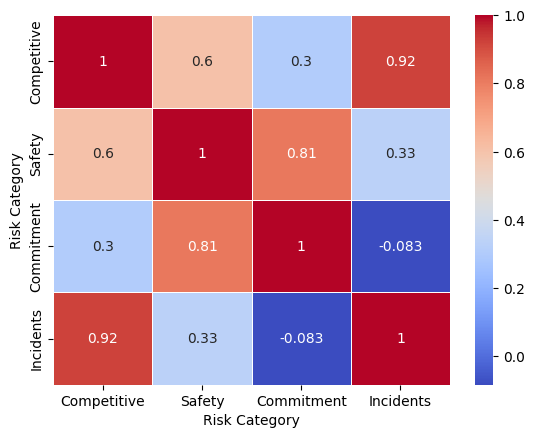

In [125]:
import seaborn as sns

# Compute the correlation matrix
corr = df_pivot.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)

# RANK VERSION

In [69]:
rank_df = df.copy()
rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Risk Category       115 non-null    object 
 1   Risk ID             115 non-null    object 
 2   Risk Indicator      115 non-null    object 
 3   Company             115 non-null    object 
 4   Value               106 non-null    float64
 5   Standardized Value  101 non-null    float64
dtypes: float64(2), object(4)
memory usage: 5.5+ KB


In [70]:
rank_df['Rank'] = rank_df.groupby(['Risk Category', 'Risk Indicator'])['Value'].rank(ascending=True, method='min')
rank_df

,Risk Category,Risk ID,Risk Indicator,Company,Value,Standardized Value,Rank
0,1. Competitive behavior/practice,1.01,Valuation growth (%),Google DeepMind,0.356217,7.333166,1.0
1,1. Competitive behavior/practice,1.02,Market share (revenue),Google DeepMind,0.070000,72.913629,4.0
2,1. Competitive behavior/practice,1.03,Acceleration (yoy change in model updates freq...,Google DeepMind,-0.780000,394.936709,1.0
3,1. Competitive behavior/practice,1.04,Acceleration (yoy change in new model frequency)*,Google DeepMind,NaN,NaN,NaN
4,1. Competitive behavior/practice,1.05,"Acquisitions - annual, count",Google DeepMind,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...
110,4. Incidents,4.01,AI-related incidents,OpenAI,30.000000,180.722892,5.0
111,4. Incidents,4.02,Cybersecurity incidents (related to security/s...,OpenAI,2.000000,500.000000,5.0
112,4. Incidents,4.03,Litigation Frequency where company is defendant,OpenAI,18.000000,346.153846,5.0
113,4. Incidents,4.04,Common Vulnerabilities and Exposures (CVE),OpenAI,18.000000,375.000000,5.0


In [71]:
rank_df.to_csv("data/riskindicators_table_rank.csv", index=False)

In [72]:
# Aggregate the data by 'Company' and 'Risk Category'
rank_cat_df = rank_df.groupby(['Risk Category', 'Company']).agg({'Rank': 'sum'}).reset_index()
rank_cat_df['Rank'] = rank_cat_df.groupby('Risk Category')['Rank'].rank(ascending=True, method='min')
rank_cat_df

,Risk Category,Company,Rank
0,1. Competitive behavior/practice,Anthropic,4.0
1,1. Competitive behavior/practice,Google DeepMind,3.0
2,1. Competitive behavior/practice,Meta AI,2.0
3,1. Competitive behavior/practice,OpenAI,5.0
4,1. Competitive behavior/practice,x.AI,1.0
5,2. ​Compliance and Safety Practices,Anthropic,5.0
6,2. ​Compliance and Safety Practices,Google DeepMind,2.0
7,2. ​Compliance and Safety Practices,Meta AI,3.0
8,2. ​Compliance and Safety Practices,OpenAI,4.0
9,2. ​Compliance and Safety Practices,x.AI,1.0


In [105]:
rank_cat_df.to_csv("data/risk_category_rank.csv", index=False)

In [101]:
# Aggregate the data by 'Company'
rank_company_df = rank_cat_df.groupby(['Company']).agg({'Rank': 'sum'}).reset_index()
rank_company_df['Rank'] = rank_company_df['Rank'].rank(ascending=True, method='min')
rank_company_df = rank_company_df.sort_values(by='Rank', ascending=True).reset_index(drop=True)
rank_company_df


,Company,Rank
0,x.AI,1.0
1,Meta AI,2.0
2,Google DeepMind,3.0
3,Anthropic,4.0
4,OpenAI,5.0


In [106]:
rank_company_df.to_csv("data/risk_company_rank.csv", index=False)

In [102]:
# Create a horizontal bar chart
fig = go.Figure(data=[
    go.Bar(
        name='Rank', 
        x=rank_company_df['Rank'], 
        y=rank_company_df['Company'], 
        orientation='h',
        text=rank_company_df.index + 1,  # Add rank as text
        textposition='auto'
    )
])

# Update the layout to remove x-axis and show y-axis with company names
fig.update_layout(
    title='Rank by Company',
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=True, tickmode='array', tickvals=rank_company_df.index, ticktext=rank_company_df['Company']),
    template='plotly_white'
)

fig.show()

In [74]:
# Create a list of unique risk categories
rank_cat = rank_cat_df['Risk Category'].unique()
rank_comp = rank_cat_df['Company'].unique()

# Create a radar chart
fig = go.Figure()

# Add a trace for each company
for company in rank_comp:
    company_data = rank_cat_df[rank_cat_df['Company'] == company]
    fig.add_trace(go.Scatterpolar(
        r=company_data['Rank'],
        theta=categories,
        connectgaps=True,
        fill='toself',
        name=company
    ))

# Update the layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]
        ),
        angularaxis=dict(
            rotation=90
        )
    ),
    showlegend=True,
    title="Risk Rank based on Category"
)

fig.show()

In [75]:
# Create a subplot with 1 row and multiple columns (one for each company)
fig = make_subplots(
    rows=1, 
    cols=len(rank_comp), 
    subplot_titles=[f"{company}" for company in rank_comp], 
    specs=[[{'type': 'polar'}] * len(rank_comp)]
)

# Add a trace for each company in its respective subplot
for i, company in enumerate(rank_comp):
    company_data = rank_cat_df[rank_cat_df['Company'] == company]
    company_data = company_data.replace({
        'Risk Category': {
            '1. Competitive behavior/practice': 'Behaviour',
            '2. \u200bCompliance and Safety Practices': 'Safety',
            '3. Commitment to emerging standards': 'Standards',
            '4. Incidents': 'Incident'
        }
    })
    fig.add_trace(go.Scatterpolar(
        r=company_data['Rank'],
        theta=company_data['Risk Category'],
        connectgaps=True,
        fill='toself',
        name=company
    ), row=1, col=i+1)

# Adjust the position of the subplot titles
for annotation in fig['layout']['annotations']:
    annotation['y'] += 0.1  

# Update the layout
for j in range(1, len(companies) + 1):
    fig.update_layout(**{f'polar{j}': dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]
        ),
        angularaxis=dict(
            rotation=90
        ))
    })

fig.update_layout(
    width=2000,  # Adjust width as needed
    showlegend=False,
    # title="Risk Index based on Category for Each Company"
)

fig.show()


In [ ]:
# Create a radar chart for each category
for category in categories:
    category_data = rank_df[rank_df['Risk Category'] == category]
    
    fig = go.Figure()
    
    # Add a trace for each company
    for company in companies:
        company_data = category_data[category_data['Company'] == company]
        fig.add_trace(go.Scatterpolargl(
            r=company_data['Rank'],
            theta=company_data['Risk ID'],
            connectgaps=True,
            fill='toself',
            name=company
        ))

    # Update the layout to move the legend to the bottom
    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.3,
            xanchor="center",
            x=0.5
        )
    )
    
    # Add annotations for Risk ID and Risk Indicator
    annotations = []
    for risk_id, risk_indicator in zip(category_data['Risk ID'].unique(), category_data['Risk Indicator'].unique()):
        annotations.append(f"{risk_id}: {risk_indicator}")
    
    # Update the layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 5]),
        angularaxis=dict(
            rotation=90
        )),
        showlegend=True,
        title=f"Rank Chart for {category}",
        annotations=[dict(
            x=1.0,
            y=1.1,
            xref="paper",
            yref="paper",
            showarrow=False,
            text="<br>".join(annotations),
            align="left"
        )]
    )
    
    fig.show()

# FULL VERSION

## Indicator Dataset

In [ ]:
# Read data
data = pd.read_excel("data/riskindicators_table.xlsx", sheet_name='Clean_Index_V2')
data['Risk Category'] = data['Risk Category'].ffill()
data = data.melt(id_vars=['Risk Category', 'Risk ID','Risk Indicator'], var_name='Company', value_name='Value')
data['Risk ID'] = data['Risk ID'].astype(str)

# Standardize the values for each indicator in each category
data['Standardized Value'] = data.groupby(['Risk Category', 'Risk Indicator'])['Value'].transform(lambda x: (x / x.mean() * 100))

# Save to CSV
data.to_csv("data/riskindicators_table_full.csv", index=False)

## Category Dataset

In [ ]:
# Aggregate the data by 'Company' and 'Risk Category'
risk_category_data = data.groupby(['Risk Category', 'Company']).agg({
    'Standardized Value': 'mean'
}).reset_index()

# Save to CSV
risk_category_data.to_csv("data/risk_category_full.csv", index=False)

## Company Dataset

In [ ]:
# Aggregate the data by 'Company'
risk_company_data = data.groupby(['Company']).agg({
    'Standardized Value': 'mean'
}).reset_index()
risk_company_data = risk_company_data.sort_values(by='Standardized Value', ascending=True).reset_index(drop=True)

# Save to CSV
risk_company_data.to_csv("data/risk_company_full.csv", index=False)